In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<h2 style="color: white;background-color: red;">Load All the Datasets</h2>

In [2]:
df_movies  = pd.read_table('movies.dat', sep='::', engine='python', header=None)
df_ratings = pd.read_table('ratings.dat', sep='::', engine='python', header=None)
df_users   = pd.read_table('users.dat', sep='::', engine='python', header=None)

# Assign the column names
df_movies.columns  = ['MovieID', 'Title', 'Genres']
df_ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
df_users.columns   = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

<h2 style="color: white;background-color: blue;"> Data Analysis <h2>

<h2 style="color: black;background-color: pink;"> Master Data Creation</h2>

In [3]:
df_user_rating = pd.merge(df_users,df_ratings, on ='UserID')

# Creating Master Data
temp1 = pd.merge(df_movies, df_ratings, on='MovieID')
temp2 = pd.merge(df_ratings, df_users, on='UserID')

# remove unwanted columns
temp1.drop(columns=['Genres', 'Timestamp'], inplace=True)
temp2.drop(columns=['Zip-code', 'Timestamp', 'Rating'], inplace=True)

# Now Mege both data frames
df_master = pd.merge(temp1, temp2, on=['MovieID', 'UserID'])
print(df_master.head())

   MovieID             Title  UserID  Rating Gender  Age  Occupation
0        1  Toy Story (1995)       1       5      F    1          10
1        1  Toy Story (1995)       6       4      F   50           9
2        1  Toy Story (1995)       8       4      M   25          12
3        1  Toy Story (1995)       9       5      M   25          17
4        1  Toy Story (1995)      10       5      F   35           1


<h2 style="color: black;background-color: yellow;"> User Age Distribution </h2>

In [4]:
age_group = df_users.groupby('Age').size()
age_group

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64

Text(0.5, 0, 'Age')

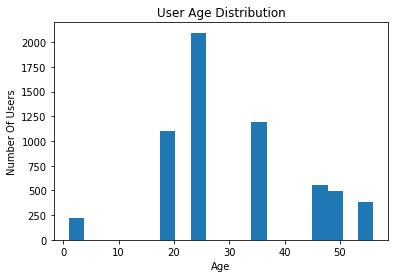

In [5]:
df_users.Age.plot.hist(bins=20)
plt.title("User Age Distribution")
plt.ylabel('Number Of Users')
plt.xlabel('Age')

<h2 style="color: white;background-color: green;"> User rating of the movie Toy Story </h2>

In [6]:
ToyStory_Data = df_ratings[df_ratings.MovieID == 1]
ToyStory_Data.groupby('Rating').size()

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

In [7]:
print("Average Rating :" + str(ToyStory_Data.Rating.mean()))

Average Rating :4.146846413095811


Text(0.5, 0, 'Rating')

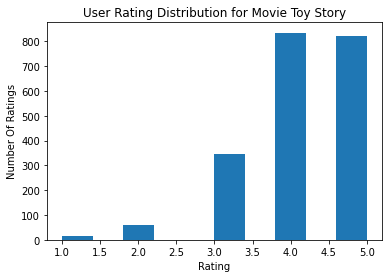

In [8]:
plt.hist(x=ToyStory_Data['Rating'])
plt.title("User Rating Distribution for Movie Toy Story")
plt.ylabel('Number Of Ratings')
plt.xlabel('Rating')

<h2 style="color: black;background-color: violet;"> Top 25 movies by viewership rating </h2>

In [9]:
group_rating = df_master[['Title','Rating']].groupby('Title')['Rating'].agg(['sum','count']).reset_index()
group_rating

,Title,sum,count
0,"$1,000,000 Duck (1971)",112,37
1,'Night Mother (1986),236,70
2,'Til There Was You (1997),140,52
3,"'burbs, The (1989)",882,303
4,...And Justice for All (1979),739,199
...,...,...,...
3701,"Zed & Two Noughts, A (1985)",99,29
3702,Zero Effect (1998),1129,301
3703,Zero Kelvin (Kj�rlighetens kj�tere) (1995),7,2
3704,Zeus and Roxanne (1997),58,23


In [10]:
group_rating.rename(columns = {'count':'Number_of_votes','sum':'Total_rating'}, inplace = True)
group_rating['Overall_rating'] = (group_rating['Total_rating']/group_rating['Number_of_votes']).round()
print(group_rating.head())

                           Title  Total_rating  Number_of_votes  \
0         $1,000,000 Duck (1971)           112               37   
1           'Night Mother (1986)           236               70   
2      'Til There Was You (1997)           140               52   
3             'burbs, The (1989)           882              303   
4  ...And Justice for All (1979)           739              199   

   Overall_rating  
0             3.0  
1             3.0  
2             3.0  
3             3.0  
4             4.0  


In [11]:
top_25_movies = group_rating.sort_values(by=['Overall_rating','Number_of_votes'], ascending = False)[['Title','Overall_rating']].head(25).reset_index()
top_25_movies.drop(columns='index',inplace=True,axis=1)
print(top_25_movies)

                                                Title  Overall_rating
0                             Schindler's List (1993)             5.0
1                    Shawshank Redemption, The (1994)             5.0
2                               Godfather, The (1972)             5.0
3                          Usual Suspects, The (1995)             5.0
4                          Wrong Trousers, The (1993)             5.0
5                               Close Shave, A (1995)             5.0
6   Seven Samurai (The Magnificent Seven) (Shichin...             5.0
7                                      Sanjuro (1962)             5.0
8                             Apple, The (Sib) (1998)             5.0
9                                     Lamerica (1994)             5.0
10                I Am Cuba (Soy Cuba/Ya Kuba) (1964)             5.0
11                 Gate of Heavenly Peace, The (1995)             5.0
12                               Smashing Time (1967)             5.0
13                  

<h2 style="color: white;background-color: black;"> Ratings for all the Movies of UserId = 2696 </h2>

In [12]:
user_2696 = df_master[df_master.UserID == 2696]
print("Movies reviewed by User 2696 \n", user_2696[['Title', 'Rating']])

Movies reviewed by User 2696 
                                                  Title  Rating
95261                               Client, The (1994)       3
200536                                Lone Star (1996)       5
270342                           Basic Instinct (1992)       4
274576               E.T. the Extra-Terrestrial (1982)       3
349333                             Shining, The (1980)       4
360382                       Back to the Future (1985)       2
448293                                 Cop Land (1997)       3
457193                        L.A. Confidential (1997)       4
459835                                Game, The (1997)       4
464473          I Know What You Did Last Summer (1997)       2
465069                    Devil's Advocate, The (1997)       4
480658  Midnight in the Garden of Good and Evil (1997)       4
493231                                 Palmetto (1998)       4
496926                              Wild Things (1998)       4
507001                  

<h2 style="color: black;background-color: skyblue;"> Feature Engineering </h2>

<h2 style="color: white;background-color: maroon;"> Unique Genres </h2>

In [13]:
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
genres_list = df_movies.Genres.tolist()
total_genres_list = []
for item in genres_list:
    total_genres_list += item.split('|')
unique_genre_list = list(dict.fromkeys(total_genres_list))
print(unique_genre_list)

['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']


<h2 style="color: black;background-color: Aqua;"> separate column for each genre category with a one-hot encoding </h2>

In [15]:
master_genres = pd.concat([df_master,df_movies.Genres], axis=1)
master_genres.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation,Genres
0,1,Toy Story (1995),1,5,F,1,10,Animation|Children's|Comedy
1,1,Toy Story (1995),6,4,F,50,9,Adventure|Children's|Fantasy
2,1,Toy Story (1995),8,4,M,25,12,Comedy|Romance
3,1,Toy Story (1995),9,5,M,25,17,Comedy|Drama
4,1,Toy Story (1995),10,5,F,35,1,Comedy


In [16]:
master_genres = pd.get_dummies(master_genres, columns=['Genres'])
master_genres.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation,Genres_Action,Genres_Action|Adventure,Genres_Action|Adventure|Animation,...,Genres_Romance|Thriller,Genres_Romance|War,Genres_Romance|Western,Genres_Sci-Fi,Genres_Sci-Fi|Thriller,Genres_Sci-Fi|Thriller|War,Genres_Sci-Fi|War,Genres_Thriller,Genres_War,Genres_Western
0,1,Toy Story (1995),1,5,F,1,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),6,4,F,50,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),8,4,M,25,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),9,5,M,25,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),10,5,F,35,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2 style="color: black;background-color: Lime;"> The Features affecting the Ratings of any particular Movie. </h2>

In [17]:
df_master.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,1,Toy Story (1995),6,4,F,50,9
2,1,Toy Story (1995),8,4,M,25,12
3,1,Toy Story (1995),9,5,M,25,17
4,1,Toy Story (1995),10,5,F,35,1


In [18]:
# one hot encoding for Gender,Age and Occupation
df_master_corr = df_master.drop(columns = ['Title','MovieID','UserID'])
df_master_corr = pd.get_dummies(df_master_corr,columns=['Gender','Age','Occupation'])
df_master_corr.head()

,Rating,Gender_F,Gender_M,Age_1,Age_18,Age_25,Age_35,Age_45,Age_50,Age_56,...,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20
0,5,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,5,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

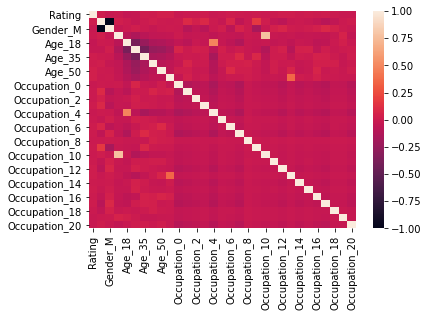

In [19]:
# visualise the data with seaborn for Correlation plot
# mask = np.triu(np.ones_like(corr, dtype=np.bool))
# sns.set_style(style = 'white')
# f, ax = plt.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(10, 250, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, 
#         square=True,
#         linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.heatmap(df_master_corr.corr())

<h2 style="color: white;background-color: Orange;"> Model to predict the movie ratings - Logistic Regression </h2>

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
x = df_master_corr.drop(columns=['Rating'])
y = df_master_corr['Rating']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 10)

In [22]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([4, 4, 4, ..., 4, 4, 4])

In [23]:
accuracy_score(y_pred=y_pred, y_true=y_test)

0.3495618928787097

<h2 style="color: white;background-color: Brown;"> Model to predict the movie ratings - Navie Bayes </h2>

In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
Y_pred = model.predict(x_test)

In [25]:
accuracy_score(y_pred=y_pred, y_true=y_test)

0.3495618928787097

In [26]:
from sklearn.decomposition import PCA

In [28]:
sklearn_pca = PCA(n_components=0.95)

In [29]:
sklearn_pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
x_train_transf = sklearn_pca.transform(x_train)

In [33]:
x_test_transf = sklearn_pca.transform(x_test)

In [37]:
lr = LogisticRegression(penalty='l1')
lr.fit(x_train_transf, y_train)
y_pred = lr.predict(x_test_transf)
y_pred

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [35]:
accuracy_score(y_pred=y_pred, y_true=y_test)

0.3495618928787097